mkdir: cannot create directory ‘build’: File exists


-- Configuring done
-- Generating done
-- Build files have been written to: /home/dieguin/PancakeSorting/build
Consolidate compiler generated dependencies of target pancake-files
[ 25%] Built target pancake-files
Consolidate compiler generated dependencies of target ExhaustiveMeasure
[ 35%] Built target ExhaustiveMeasure
Consolidate compiler generated dependencies of target Run
[ 45%] Built target Run
Consolidate compiler generated dependencies of target gtest
[ 55%] Built target gtest
Consolidate compiler generated dependencies of target gtest_main
[ 65%] Built target gtest_main
Consolidate compiler generated dependencies of target Google_Tests_run
[ 80%] Built target Google_Tests_run
Consolidate compiler generated dependencies of target gmock
[ 90%] Built target gmock
Consolidate compiler generated dependencies of target gmock_main
[100%] Built target gmock_main


Text(0, 0.5, 'Time in milliseconds')

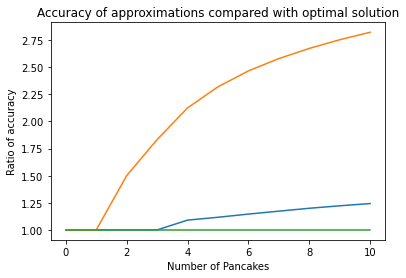

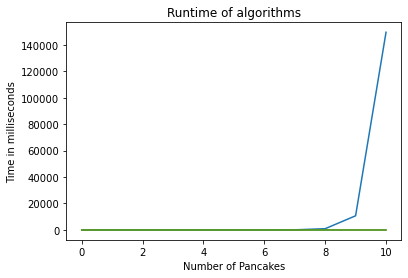

In [3]:
from os import stat
import subprocess
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

subprocess.run(["mkdir build"], shell=True, cwd=".")
subprocess.run(["cmake .."], shell=True, cwd="./build")
subprocess.run(["make"], shell=True, cwd="./build")

original_stdout = sys.stdout

max_list_size = 10
actual_prom = [1.]*(max_list_size + 1)
approx3_prom = [0.]*(max_list_size + 1)
approx2_prom = [0.]*(max_list_size + 1)
time_exhaustive = [0.]*(max_list_size + 1)
time_approx3 = [0.]*(max_list_size + 1)
time_approx2 = [0.]*(max_list_size + 1)

s = subprocess.check_output(["./ExhaustiveMeasure"], shell=True, cwd="./build", text=True, input=str(max_list_size))
s = s.split("\n")
s_temp = s[0].split(' ')
for i in range(1, max_list_size + 1):
    time_exhaustive[i] = float(s_temp[i-1])
s_temp = s[1].split(' ')
for i in range(1, max_list_size + 1):
    time_approx3[i] = float(s_temp[i-1])
s_temp = s[2].split(' ')
for i in range(1, max_list_size + 1):
    time_approx2[i] = float(s_temp[i-1])
s_temp = s[3].split(' ')
for i in range(1, max_list_size + 1):
    approx3_prom[i] = float(s_temp[i-1])
s_temp = s[4].split(' ')
for i in range(1, max_list_size + 1):
    approx2_prom[i] = float(s_temp[i-1])

fig, ax = plt.subplots()
approx2_prom[0] = 1
approx3_prom[0] = 1
ax.plot(list(range(0, max_list_size + 1)), approx2_prom, label='Approx-2')
ax.plot(list(range(0, max_list_size + 1)), approx3_prom, label='Approx-3')
ax.plot(list(range(0, max_list_size + 1)), actual_prom, label='Exhaustive algorithm')
ax.set_title("Accuracy of approximations compared with optimal solution")
ax.set_xlabel("Number of Pancakes")
ax.set_ylabel("Ratio of accuracy")

fig2, ax2 = plt.subplots()
ax2.plot(list(range(0, max_list_size + 1)), time_exhaustive, label='Exhaustive algorithm')
ax2.plot(list(range(0, max_list_size + 1)), time_approx2, label='Approx-2')
ax2.plot(list(range(0, max_list_size + 1)), time_approx3, label='Approx-3')
ax2.set_title("Runtime of algorithms")
ax2.set_xlabel("Number of Pancakes")
ax2.set_ylabel("Time in milliseconds")
